# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import cc3d
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms
from IPython.display import clear_output
from skimage.io import imread, imsave
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

import transforms3d as T
from dataset3d import BNSet
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

name_legend = {
    "ac": "brown_cricket",
    "bc": "black_cricket",
    "bf": "blow_fly",
    "bl": "buffalo_bettle_larva",
    "bp": "blow_fly_pupa",
    "cf": "curly-wing_fly",
    "gh": "grasshopper",
    "ma": "maggot",
    "ml": "mealworm",
    "pp": "green_bottle_fly_pupa",
    "sl": "soldier_fly_larva",
    "wo": "woodlice",
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# Segmentation
Using a fast and great implementation of connected components in 3D:
https://github.com/seung-lab/connected-components-3d/?tab=readme-ov-file

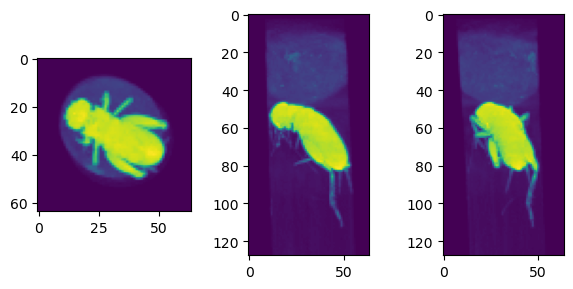

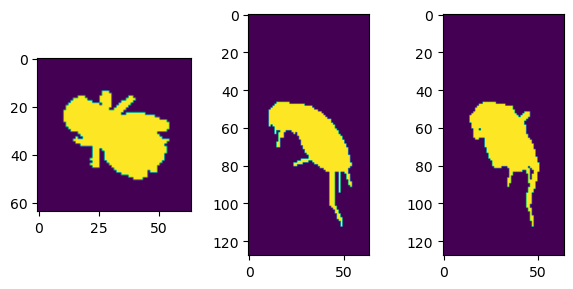

In [4]:
dset = BNSet(data_dir, "train")

volume, _ = dset[0]
# labels_out = cc3d.connected_components(volume[0] > 20)
# labels_out = cc3d.largest_k(
#     volume[0],
#     k=1,
#     connectivity=26,
#     delta=
# )


labels_out = cc3d.connected_components(volume[0], delta=3)
labels_out = cc3d.largest_k(labels_out > 1, k=1, connectivity=26)

show_volume(volume[0])
show_volume(labels_out)

In [5]:
mask_dir = f"{data_dir}/train_mask"
if not os.path.exists(mask_dir):
    os.mkdir(mask_dir)

for item in tqdm(range(len(dset))):
    volume, _ = dset[item]

    mask_c_dir = f"{mask_dir}/{os.path.basename(os.path.dirname(dset.volumes[item]))}"
    if not os.path.exists(mask_c_dir):
        os.mkdir(mask_c_dir)
    
    dst = f"{mask_c_dir}/{os.path.basename(dset.volumes[item])}"
    # labels_out, N = cc3d.largest_k(
    #     volume[0] > 40,
    #     k=1,
    #     connectivity=26,
    #     delta=0,
    #     return_N=True,
    # )
    labels_out = cc3d.connected_components(volume[0], delta=3)
    labels_out = cc3d.largest_k(labels_out > 1, k=1, connectivity=26)

    imsave(dst, labels_out, check_contrast=False)
    
    # show_volume(volume[0])
    # show_volume(labels_out)

  0%|          | 0/9154 [00:00<?, ?it/s]